In [1]:
from fastai.vision import * 
from fastai import *
import tarfile
import gzip
from mat4py import * 
import pandas as pd

In [2]:
#!wget http://imagenet.stanford.edu/internal/car196/car_ims.tgz

In [3]:
#!wget http://imagenet.stanford.edu/internal/car196/cars_annos.mat

In [4]:
#tar = tarfile.open("car_ims.tgz")
#tar.extractall()
#tar.close()

In [5]:
mat = loadmat('cars_annos.mat')

In [6]:
for k in mat['annotations'].keys():
    print(k)  

relative_im_path
bbox_x1
bbox_y1
bbox_x2
bbox_y2
class
test


In [8]:
d = {'path' : mat['annotations']['relative_im_path'],'class' : mat['annotations']['class']}
class_names = {(i+1):j for i,j in enumerate(mat['class_names'])}    
named = [class_names[label] for label in d['class']]

In [9]:
d = {'path' : mat['annotations']['relative_im_path'],'class' : mat['annotations']['class'], 'named': named}

In [10]:
data_list = pd.DataFrame(data=d)

In [11]:
data_list[1:10]

,path,class,named
1,car_ims/000002.jpg,1,AM General Hummer SUV 2000
2,car_ims/000003.jpg,1,AM General Hummer SUV 2000
3,car_ims/000004.jpg,1,AM General Hummer SUV 2000
4,car_ims/000005.jpg,1,AM General Hummer SUV 2000
5,car_ims/000006.jpg,1,AM General Hummer SUV 2000
6,car_ims/000007.jpg,1,AM General Hummer SUV 2000
7,car_ims/000008.jpg,1,AM General Hummer SUV 2000
8,car_ims/000009.jpg,1,AM General Hummer SUV 2000
9,car_ims/000010.jpg,1,AM General Hummer SUV 2000


In [12]:
msk = np.random.rand(len(data_list)) < 0.9
train = data_list[msk]
test = data_list[~msk]

In [13]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_df('', train, ds_tfms=tfms, size=224, label_col=2)
data.normalize(imagenet_stats)

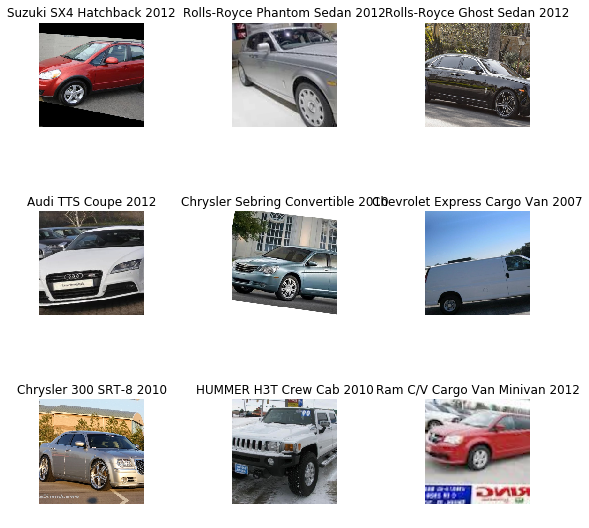

In [14]:
data.show_batch(rows=3,  figsize=(8,8))

In [15]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [16]:
learn.lr_find()

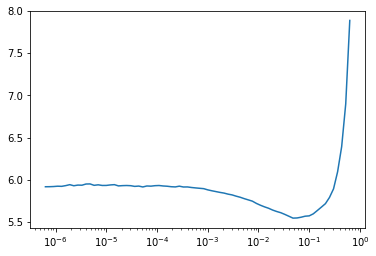

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(10, max_lr=slice(1e-3,1e-2))

Total time: 32:21
epoch  train loss  valid loss  error_rate
1      3.721328    2.630340    0.638824    (03:24)
2      2.374360    1.858807    0.495824    (03:13)
3      2.048304    1.574106    0.417641    (03:13)
4      1.716102    1.381630    0.368192    (03:13)
5      1.426918    1.086195    0.310057    (03:12)
6      1.116500    0.945025    0.261945    (03:13)
7      0.875047    0.767812    0.211828    (03:12)
8      0.694520    0.672934    0.189442    (03:13)
9      0.568278    0.645261    0.180755    (03:13)
10     0.502871    0.636227    0.179753    (03:13)



In [20]:
learn.save('stage-1-50')

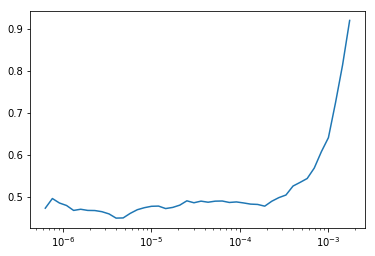

In [21]:
learn.load('stage-1-50')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()


In [22]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,5e-6))

KeyboardInterrupt: 

In [26]:
learn.save('stage-1-50-finetune')

In [27]:
learn.load('stage-1-50-finetune')

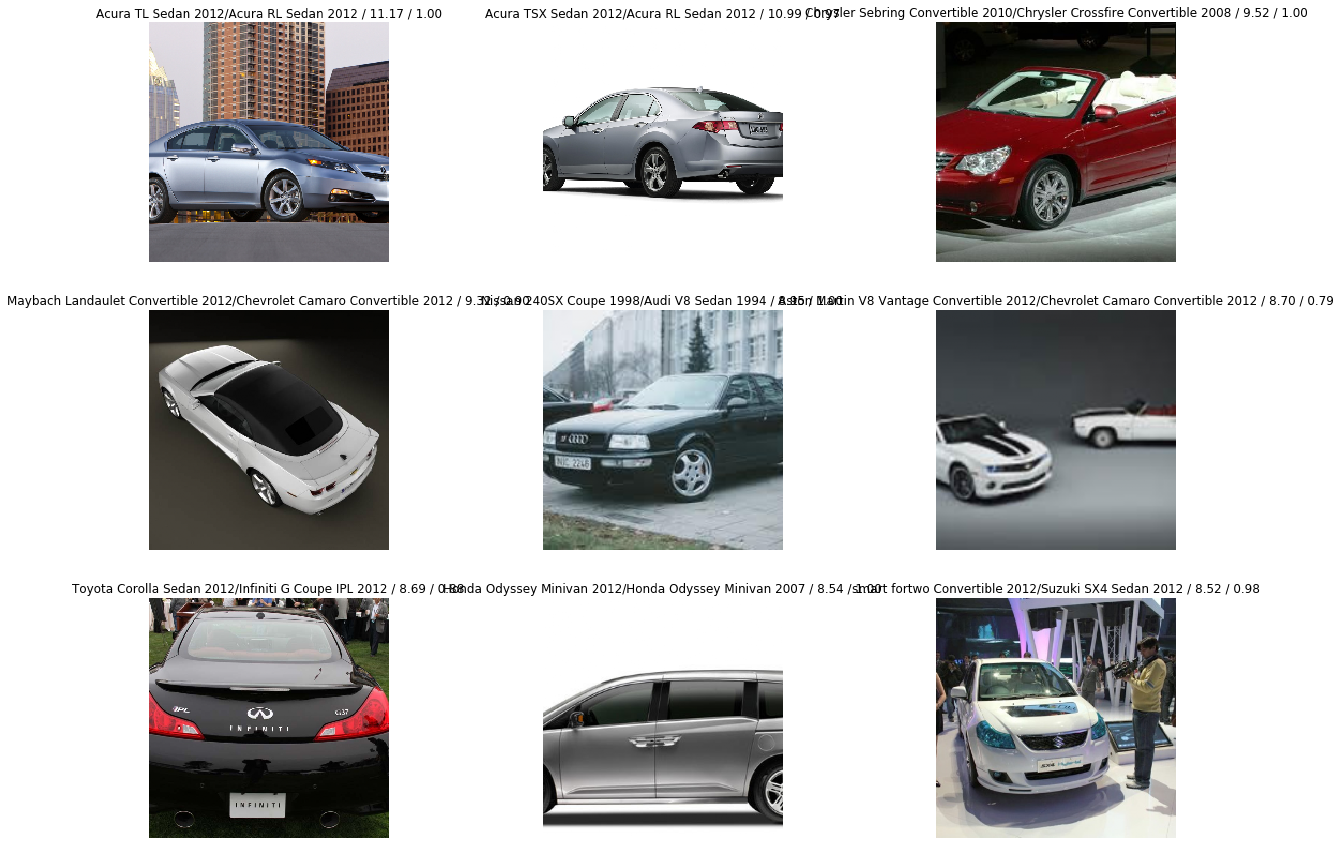

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(20,15))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  10),
 ('Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  9),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 8),
 ('Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 7),
 ('Ferrari 458 Italia Convertible 2012', 'Ferrari 458 Italia Coupe 2012', 7),
 ('Ferrari 458 Italia Coupe 2012', 'Ferrari 458 Italia Convertible 2012', 6),
 ('AM General Hummer SUV 2000', 'HUMMER H2 SUT Crew Cab 2009', 5),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 5),
 ('Bentley Continental GT Coupe 2012', 'Bentley Continental GT Coupe 2007', 5),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 5),
 ('Dodge Sprinter Cargo Van 2009', 'Mercedes-Benz Sprinter Van 2012', 5),
 ('Rolls-Royce Ghost Sedan 2012', 'Rolls-Royce Phantom Sedan 2012', 5),
 ('Audi A5 Coupe 2012', 'Audi S5 Coupe 2012', 4),
 ('Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 4),
 ('Audi 